In [47]:
'''
Data Collection & Preparation

Our project objective is to predict that it will rain tomorrow, won't it?
Our dataset comes from https://www.wunderground.com/,internet 1st weather sevice. 
We used available data of 57 stations in Thailand during 2013-2017. 
'''

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.feature_selection import RFE3

In [45]:
'''
Data Preparation

After we scrapped our data from https://www.wunderground.com/, we handled and converted it to .csv.
'''
data = pd.read_csv('data_wunderground.csv')

'''
We transformed our data features to be appropriate type.
'''

data[['Temp_high', 'Temp_avg', 'Temp_low',
       'Dew_high', 'Dew_avg', 'Dew_low', 'Humidity_high', 'Humidity_avg',
       'Humidity_low', 'SeaPressure_high', 'SeaPressure_avg',
       'SeaPressure_low', 'Visibility_high', 'Visibility_avg',
       'Visibility_low', 'Wind_high', 'Wind_avg', 'Precip',
         'Temp_high_1', 'Temp_avg_1',
       'Temp_low_1', 'Dew_high_1', 'Dew_avg_1', 'Dew_low_1', 'Humidity_high_1',
       'Humidity_avg_1', 'Humidity_low_1', 'SeaPressure_high_1',
       'SeaPressure_avg_1', 'SeaPressure_low_1', 'Visibility_high_1',
       'Visibility_avg_1', 'Visibility_low_1', 'Wind_high_1', 'Wind_avg_1',
       'Precip_1', 'Temp_high_2', 'Temp_avg_2', 'Temp_low_2',
       'Dew_high_2', 'Dew_avg_2', 'Dew_low_2', 'Humidity_high_2',
       'Humidity_avg_2', 'Humidity_low_2', 'SeaPressure_high_2',
       'SeaPressure_avg_2', 'SeaPressure_low_2', 'Visibility_high_2',
       'Visibility_avg_2', 'Visibility_low_2', 'Wind_high_2', 'Wind_avg_2',
       'Precip_2']] =data[['Temp_high', 'Temp_avg', 'Temp_low',
       'Dew_high', 'Dew_avg', 'Dew_low', 'Humidity_high', 'Humidity_avg',
       'Humidity_low', 'SeaPressure_high', 'SeaPressure_avg',
       'SeaPressure_low', 'Visibility_high', 'Visibility_avg',
       'Visibility_low', 'Wind_high', 'Wind_avg', 'Precip',
        'Temp_high_1', 'Temp_avg_1',
       'Temp_low_1', 'Dew_high_1', 'Dew_avg_1', 'Dew_low_1', 'Humidity_high_1',
       'Humidity_avg_1', 'Humidity_low_1', 'SeaPressure_high_1',
       'SeaPressure_avg_1', 'SeaPressure_low_1', 'Visibility_high_1',
       'Visibility_avg_1', 'Visibility_low_1', 'Wind_high_1', 'Wind_avg_1',
       'Precip_1', 'Temp_high_2', 'Temp_avg_2', 'Temp_low_2',
       'Dew_high_2', 'Dew_avg_2', 'Dew_low_2', 'Humidity_high_2',
       'Humidity_avg_2', 'Humidity_low_2', 'SeaPressure_high_2',
       'SeaPressure_avg_2', 'SeaPressure_low_2', 'Visibility_high_2',
       'Visibility_avg_2', 'Visibility_low_2', 'Wind_high_2', 'Wind_avg_2',
       'Precip_2']].convert_objects(convert_numeric=True)
data[['Rain','Rain_1','Rain_2','year','month','RainShift']]=data[['Rain','Rain_1','Rain_2','year','month','RainShift']].astype(str)
data['date']=pd.to_datetime(data['date'])

data = data.drop(['Wind_high.1','Event','sheet', 'date'],axis=1)
data = data.drop(data.columns[0],axis=1)

C:\Users\Graphic\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Graphic\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [ ]:
'''
Data Exploration

Consider a number of raining day across categorical features like month, year, station to see some obvious relationship
by using barchart.
'''
%matplotlib inline
pd.crosstab(data.month,data.RainShift).plot(kind='bar')
plt.title('Rainy day frequency for month')
plt.xlabel('Month')
plt.ylabel('Frequency of Rainy day')

pd.crosstab(data.year,data.RainShift).plot(kind='bar')
plt.title('Rainy day frequency for year')
plt.xlabel('Year')
plt.ylabel('Frequency of Rainy day')

pd.crosstab(data.Station,data.RainShift).plot(kind='bar')
plt.title('Rainy day frequency for each station')
plt.xlabel('Station')
plt.ylabel('Frequency of Rainy day')

In [ ]:
'''
Data Exploration

Consider a number of raining day across ordinal features to see some obvious relationship
by using boxplot.
'''
sns.boxplot(x=data['RainShift'], y=data['Temp_high'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Dew_high'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Humidity_high'], data=data)
sns.boxplot(x=data['RainShift'], y=data['SeaPressure_high'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Visibility_high'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Wind_high'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Precip'], data=data)

sns.boxplot(x=data['RainShift'], y=data['Temp_avg'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Dew_avg'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Humidity_avg'], data=data)
sns.boxplot(x=data['RainShift'], y=data['SeaPressure_avg'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Visibility_avg'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Wind_avg'], data=data)

sns.boxplot(x=data['RainShift'], y=data['Temp_low'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Dew_low'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Humidity_low'], data=data)
sns.boxplot(x=data['RainShift'], y=data['SeaPressure_low'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Visibility_low'], data=data)
sns.boxplot(x=data['RainShift'], y=data['Wind_low'], data=data)

In [ ]:
'''
Data Exploration

Consider relationship between ordinal features by using heatmap.
'''
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation between Ordinal Features', y=1.05, size=15)
sns.heatmap(data['Temp_high', 'Temp_avg', 'Temp_low',
       'Dew_high', 'Dew_avg', 'Dew_low', 'Humidity_high', 'Humidity_avg',
       'Humidity_low', 'SeaPressure_high', 'SeaPressure_avg',
       'SeaPressure_low', 'Visibility_high', 'Visibility_avg',
       'Visibility_low', 'Wind_high', 'Wind_avg', 'Precip',
         'Temp_high_1', 'Temp_avg_1',
       'Temp_low_1', 'Dew_high_1', 'Dew_avg_1', 'Dew_low_1', 'Humidity_high_1',
       'Humidity_avg_1', 'Humidity_low_1', 'SeaPressure_high_1',
       'SeaPressure_avg_1', 'SeaPressure_low_1', 'Visibility_high_1',
       'Visibility_avg_1', 'Visibility_low_1', 'Wind_high_1', 'Wind_avg_1',
       'Precip_1', 'Temp_high_2', 'Temp_avg_2', 'Temp_low_2',
       'Dew_high_2', 'Dew_avg_2', 'Dew_low_2', 'Humidity_high_2',
       'Humidity_avg_2', 'Humidity_low_2', 'SeaPressure_high_2',
       'SeaPressure_avg_2', 'SeaPressure_low_2', 'Visibility_high_2',
       'Visibility_avg_2', 'Visibility_low_2', 'Wind_high_2', 'Wind_avg_2',
       'Precip_2'].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [46]:
'''
Training Models

Choosing a model

We decide to use logistic regression model for our project because 
    1. Most of our feature are qualitative data. It can be use to fit regression equation easily.
    2. Logistic regression is the suitable model for binary classification.

From barchart 'Rainy day frequency for year', we clearly saw that feature 'year' didn't affect our outcomes so we decides to exclude it.
Because we decided to use logist regression model, we needed to transform our categorical features to dummy variables.
'''
data2 = data
data2 = data2.drop('year',axis=1)
data2=data2.dropna()
data2=data2.join(pd.get_dummies(data2['month'], prefix='month')) # add dummy month
# data2=data2.join(pd.get_dummies(data2['Station'], prefix='Station')) # add dummy Station
data2_vars=data2.columns.values.tolist()

# y=['RainShift']
# X=[i for i in data2_vars if i not in y]
train = data2.drop(['Station','month'],axis=1).astype(float)
y = train['RainShift'].values
X = train.drop('RainShift',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [15]:
'''
Fitting parameters

We decided to use sklearn.feature_selection.RFE for features selection.

Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), 
the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. 
First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through 
a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. 
That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.
'''
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
# print(rfe.support_)
# print(rfe.ranking_)
ranking = pd.DataFrame(data={'ranking': rfe.ranking_.reshape((rfe.ranking_.shape[0])), 'feature': X_train.columns.tolist()})

In [16]:
ranking.sort_values('ranking').head(40)

,feature,ranking
0,Temp_high,1
29,SeaPressure_avg_1,1
30,SeaPressure_low_1,1
31,Visibility_high_1,1
67,month_8,1
37,Rain_1,1
38,Temp_high_2,1
41,Dew_high_2,1
48,SeaPressure_avg_2,1
49,SeaPressure_low_2,1


In [ ]:
'''
We use statmodels for creating logistic regression model because it's easy to represent the result. 
'''

import statsmodels.api as sm
select=[i for i in data2_vars if i in ranking[ranking['ranking']==1]['feature'].tolist()] # get significant feature
logit_model=sm.Logit(y_train.astype(float),X_train[select].astype(float))
result=logit_model.fit()
print(result.summary())

In [ ]:
'''
Model Tuning

10-fold Cross Validation
'''

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'precision'
results = model_selection.cross_val_score(modelCV,X_train[select], y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average precision: %.3f" % (results.mean()))
scoring = 'recall'
results = model_selection.cross_val_score(modelCV,X_train[select], y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average recall: %.3f" % (results.mean()))
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV,X_train[select], y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average roc_auc: %.3f" % (results.mean()))

'''
Accuracy of logistic regression classifier on test set: 0.769
10-fold cross validation average accuracy: 0.771
10-fold cross validation average precision: 0.648
10-fold cross validation average recall: 0.522
'''

In [17]:
'''
Model Evaluation

Implement the model using scikitlearn
'''

model = LogisticRegression()
model.fit(X_train[select], y_train)
y_pred = model.predict(X_test[select])
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test[select], y_test)))

Accuracy of logistic regression classifier on test set: 0.767


             precision    recall  f1-score   support

        0.0       0.81      0.88      0.84     18876
        1.0       0.65      0.52      0.58      8285

avg / total       0.76      0.77      0.76     27161

[[16538  2338]
 [ 3978  4307]]


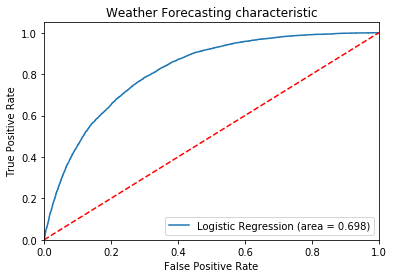

In [18]:
'''
Model Evaluation
'''
# ROC Curve
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(cm)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test[select]))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[select])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weather Forecasting characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

C:\Users\Graphic\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.472412
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                63375
Model:                          Logit   Df Residuals:                    63357
Method:                           MLE   Df Model:                           17
Date:                Sun, 29 Apr 2018   Pseudo R-squ.:                  0.2293
Time:                        08:40:36   Log-Likelihood:                -29939.
converged:                       True   LL-Null:                       -38844.
                                        LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Temp_avg             -0.1235      0.009    -13.681      0.000      -0.141      -0.106
Dew_avg 

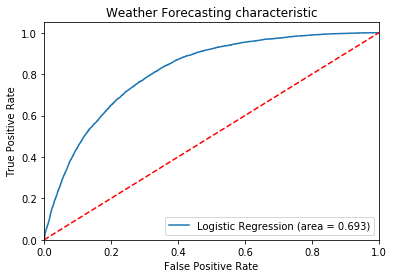

In [11]:
'''
Model Tuning

1.Using only avearage value
Precision and Recall are not much difference from the previous model. However, this model requires less feature
, so it is simpler while has the same accuracy.
'''
data3 = data2[['Temp_avg','Dew_avg','Humidity_high','SeaPressure_avg','Visibility_avg','Wind_avg','Precip','Rain', 'RainShift','Temp_avg_1', 'Dew_avg_1','Humidity_avg_1', 'SeaPressure_avg_1','Visibility_avg_1','Wind_avg_1','Precip_1', 'Rain_1','Temp_avg_2','Dew_avg_2','Humidity_avg_2','SeaPressure_avg_2','Visibility_avg_2','Wind_avg_2','Precip_2', 'Rain_2', 'month_1', 'month_10', 'month_11',
       'month_12', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6','month_7', 'month_8', 'month_9']]
train=data3
data3_vars = data3_vars=data2.columns.values.tolist()
y = train['RainShift'].values
X =train.drop('RainShift',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=43)
'''
Feature Selection
'''
# Feature Selection by RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
#print(rfe.support_)
#print(rfe.ranking_)
ranking = pd.DataFrame(data={'ranking': rfe.ranking_.reshape((rfe.ranking_.shape[0])), 'feature': X_train.columns.tolist()})
'''
Logistic Regression
'''
# Implement the model using statmodel
import statsmodels.api as sm
select=[i for i in data3_vars if i in ranking[ranking['ranking']==1]['feature'].tolist()]
logit_model=sm.Logit(y_train.astype(float),X_train[select].astype(float))
result=logit_model.fit()
print(result.summary())
# Implement the model using scikitlearn
model = LogisticRegression()
model.fit(X_train[select], y_train)
y_pred = model.predict(X_test[select])
# print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test[select], y_test)))
# Model Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(cm)
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test.astype(float), model.predict(X_test[select]).astype(float))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), model.predict_proba(X_test[select])[:,1].astype(float))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weather Forecasting characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
# function: import today weather from website
from collections import namedtuple  
import datetime
from datetime import timedelta
import pandas as pd  
import requests  
import matplotlib.pyplot as plt  
# API Format: http://api.wunderground.com/api/API_KEY/history_YYYYMMDD/q/STATE/STATION.json  
API_KEY = '8d76c18c44f20276'  
BASE_URL = "http://api.wunderground.com/api/{}/history_{}/q/TH/{}.json"  
# target_date = datetime(2017, 4, 8)  # input date 2 days ago
target_date = datetime.datetime.now() - timedelta(days=2)
station = 'VTBC'
features = ['date', 'Temp_high', 'Temp_avg', 'Temp_low', 'Dew_high','Dew_avg', 'Dew_low',  
           'Humidity_high', 'Humidity_low', 'SeaPressure_high', 'SeaPressure_avg', 'SeaPressure_low','Precip','Rain']
DailySummary = namedtuple("DailySummary", features) 
def extract_weather_data(url, api_key, target_date, days, station):  
    records = []
    for _ in range(days):
        request = BASE_URL.format(API_KEY, target_date.strftime('%Y%m%d'),station)
        response = requests.get(request)
        if response.status_code == 200:
            data = response.json()['history']['dailysummary'][0]
            records.append(DailySummary(
                date=target_date,
                Temp_high=data['maxtempm'],
                Temp_avg=data['meantempm'],
                Temp_low=data['mintempm'],
                Dew_high=data['maxdewptm'],
                Dew_avg=data['meandewptm'],
                Dew_low=data['mindewptm'],
                Humidity_high=data['maxhumidity'],
                #meanhumidity=data['meanhumidity'],
                Humidity_low=data['minhumidity'],
                SeaPressure_high=data['maxpressurem'],
                SeaPressure_avg=data['meanpressurem'],
                SeaPressure_low=data['minpressurem'],
                #maxvism=data['maxvism'],
                #meanvism=data['meanvism'],
                #minvism=data['minvism'],
                #maxwspdm=data['maxwspdm'],
                #meanwspdm=data['meanwspdm'],
                Precip=data['precipm'],
                Rain=data['rain']))
        # time.sleep(6)
        target_date += timedelta(days=1)
        features = ['date', 'Temp_high', 'Temp_avg', 'Temp_low', 'Dew_high','Dew_avg', 'Dew_low',  
           'Humidity_high', 'Humidity_low', 'SeaPressure_high', 'SeaPressure_avg', 'SeaPressure_low','Precip','Rain']
    df = pd.DataFrame(records, columns=features).set_index('date') 
    
    # create 1 day ago column
    df['Temp_high_1']=df['Temp_high'].shift(1)
    df['Temp_avg_1']=df['Temp_avg'].shift(1)
    df['Temp_low_1']=df['Temp_low'].shift(1)
    df['Dew_high_1']=df['Dew_high'].shift(1)
    df['Dew_avg_1']=df['Dew_avg'].shift(1)
    df['Dew_low_1']=df['Dew_low'].shift(1)
    df['Humidity_high_1']=df['Humidity_high'].shift(1)
    #df['Humidity_avg_1']=df['Humidity_avg'].shift(1)
    df['Humidity_low_1']=df['Humidity_low'].shift(1)
    df['SeaPressure_high_1']=df['SeaPressure_high'].shift(1)
    df['SeaPressure_avg_1']=df['SeaPressure_avg'].shift(1)
    df['SeaPressure_low_1']=df['SeaPressure_low'].shift(1)
    #df['Visibility_high_1']=df['Visibility_high'].shift(1)
    #df['Visibility_avg_1']=df['Visibility_avg'].shift(1)
    #df['Visibility_low_1']=df['Visibility_low'].shift(1)
    #df['Wind_high_1']=df['Wind_high'].shift(1)
    #df['Wind_avg_1']=df['Wind_avg'].shift(1)
    df['Precip_1']=df['Precip'].shift(1)
    df['Rain_1']=df['Rain'].shift(1)

    # create 2 days ago column
    df['Temp_high_2']=df['Temp_high'].shift(2)
    df['Temp_avg_2']=df['Temp_avg'].shift(2)
    df['Temp_low_2']=df['Temp_low'].shift(2)
    df['Dew_high_2']=df['Dew_high'].shift(2)
    df['Dew_avg_2']=df['Dew_avg'].shift(2)
    df['Dew_low_2']=df['Dew_low'].shift(2)
    df['Humidity_high_2']=df['Humidity_high'].shift(2)
    #df['Humidity_avg_2']=df['Humidity_avg'].shift(2)
    df['Humidity_low_2']=df['Humidity_low'].shift(2)
    df['SeaPressure_high_2']=df['SeaPressure_high'].shift(2)
    df['SeaPressure_avg_2']=df['SeaPressure_avg'].shift(2)
    df['SeaPressure_low_2']=df['SeaPressure_low'].shift(2)
    #df['Visibility_high_2']=df['Visibility_high'].shift(2)
    #df['Visibility_avg_2']=df['Visibility_avg'].shift(2)
    #df['Visibility_low_2']=df['Visibility_low'].shift(2)
    #df['Wind_high_2']=df['Wind_high'].shift(2)
    #df['Wind_avg_2']=df['Wind_avg'].shift(2)
    df['Precip_2']=df['Precip'].shift(2)
    df['Rain_2']=df['Rain'].shift(2)

    # get month
    df['month']=datetime.datetime.now().month
    return df
# today_value = extract_weather_data(BASE_URL, API_KEY, target_date, 3, station) 
# today_value

In [52]:
# Dropdown menu
from tkinter import *

OPTIONS = ["VTBD","VTBL","Mar"]
master = Tk()
master.title("Welcome to Weather Forecasting")
master.geometry('350x200')
lbl = Label(master, text="Please Select Station",font=("Arial Bold", 20),foreground='red')
#lbl.grid(column=0, row=0)
lbl.pack()
variable = StringVar(master)
#variable.set(OPTIONS[0]) # default value

w = OptionMenu(master, variable, *OPTIONS)
w.pack()

def ok():
    if variable.get()=='Mar': station="1"
    else: station = variable.get()
    print ("Station: " + station)
    today_value = extract_weather_data(BASE_URL, API_KEY, target_date, 3, station) 
    # print(today_value2)
    # add dunmmy to today_value
    for i in range(1,13,1):
        today_value["month_"+str(i)]=0
    today_value["month_"+str(today_value['month'][2])] = 1  
    # Predict and print
    print("Tomorrow the probability of raining: "+str(np.round(model.predict_proba(today_value[select].drop(today_value.index[[0,1]]))[0,1]*100,decimals=2))+" %")
button = Button(master, text="OK",foreground='white',background='black', command=ok)
button.pack()


mainloop()

Station: VTBD
Tomorrow the probability of raining: 58.63 %


In [ ]:
'''
Model Tuning

2.Using temp*Press
From the weather forecasting method of Meteorological Department, 
they said that when temperature is high and pressure is low, there is high probability that it will rain. 
Therefore, a new feature which concern about interaction between temperature and pressure is introduced.
First, we add temperature multiplied by pressure (for all case) as new feature,
but it is obvious that temperature*pressure are not significant features.
Second, we try temperature divided by pressure (for all case) as new feature 
and we hope that it will improve model performance since when temperature is high 
and pressure is low (it is going to rain), this new feature will has high value. 
However, it is the same result as the first case.
'''
data3 = data2.copy(deep=True)
data3['Temp*Press_high']=data3['Temp_high']*data3['SeaPressure_high']
data3['Temp*Press_avg']=data3['Temp_avg']*data3['SeaPressure_avg']
data3['Temp*Press_low']=data3['Temp_low']*data3['SeaPressure_low']
data3['Temp*Press_high_1']=data3['Temp_high_1']*data3['SeaPressure_high_1']
data3['Temp*Press_avg_1']=data3['Temp_avg_1']*data3['SeaPressure_avg_1']
data3['Temp*Press_low_1']=data3['Temp_low_1']*data3['SeaPressure_low_1']
data3['Temp*Press_high_2']=data3['Temp_high_2']*data3['SeaPressure_high_2']
data3['Temp*Press_avg_2']=data3['Temp_avg_2']*data3['SeaPressure_avg_2']
data3['Temp*Press_low_2']=data3['Temp_low_2']*data3['SeaPressure_low_2']
train = data3.drop(['Station','month'],axis=1).astype(float)
y = train['RainShift'].values
X =train.drop('RainShift',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
'''
Feature Selection
'''
# Feature Selection by RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
#print(rfe.support_)
#print(rfe.ranking_)
ranking = pd.DataFrame(data={'ranking': rfe.ranking_.reshape((rfe.ranking_.shape[0])), 'feature': X_train.columns.tolist()})
'''
Logistic Regression
'''
# Implement the model using statmodel
import statsmodels.api as sm
select=[i for i in data2_vars if i in ranking[ranking['ranking']==1]['feature'].tolist()]
logit_model=sm.Logit(y_train.astype(float),X_train[select].astype(float))
result=logit_model.fit()
print(result.summary())
# Implement the model using scikitlearn
model = LogisticRegression()
model.fit(X_train[select], y_train)
y_pred = model.predict(X_test[select])
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test[select], y_test)))
# Model Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(cm)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test[select]))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[select])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weather Forecasting characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
'''
Model Tuning

3.Using Temp/Press
'''

data3 = data2.copy(deep=True)
data3['Temp/Press_high']=data3['Temp_high']/data3['SeaPressure_high']
data3['Temp/Press_avg']=data3['Temp_avg']/data3['SeaPressure_avg']
data3['Temp/Press_low']=data3['Temp_low']/data3['SeaPressure_low']
data3['Temp/Press_high_1']=data3['Temp_high_1']/data3['SeaPressure_high_1']
data3['Temp/Press_avg_1']=data3['Temp_avg_1']/data3['SeaPressure_avg_1']
data3['Temp/Press_low_1']=data3['Temp_low_1']/data3['SeaPressure_low_1']
data3['Temp/Press_high_2']=data3['Temp_high_2']/data3['SeaPressure_high_2']
data3['Temp/Press_avg_2']=data3['Temp_avg_2']/data3['SeaPressure_avg_2']
data3['Temp/Press_low_2']=data3['Temp_low_2']/data3['SeaPressure_low_2']
train = data3.drop(['Station','month'],axis=1).astype(float)
y = train['RainShift'].values
X =train.drop('RainShift',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
'''
Feature Selection
'''
# Feature Selection by RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
#print(rfe.support_)
#print(rfe.ranking_)
ranking = pd.DataFrame(data={'ranking': rfe.ranking_.reshape((rfe.ranking_.shape[0])), 'feature': X_train.columns.tolist()})
'''
Logistic Regression
'''
# Implement the model using statmodel
import statsmodels.api as sm
select=[i for i in data2_vars if i in ranking[ranking['ranking']==1]['feature'].tolist()]
logit_model=sm.Logit(y_train.astype(float),X_train[select].astype(float))
result=logit_model.fit()
print(result.summary())
# Implement the model using scikitlearn
model = LogisticRegression()
model.fit(X_train[select], y_train)
y_pred = model.predict(X_test[select])
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test[select], y_test)))
# Model Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(cm)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test[select]))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[select])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weather Forecasting characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
'''

'''

In [ ]:
'''
Model Tuning

4.Using SeaPressure^2
ROC is lower, so it is not a good model
'''
data3 = data2.copy(deep=True)
data3['SeaPressure^2_high']=data3['SeaPressure_high']**2
data3['SeaPressure^2_avg']=data3['SeaPressure_avg']**2
data3['SeaPressure^2_low']=data3['SeaPressure_low']**2
data3['SeaPressure^2_high_1']=data3['SeaPressure_high_1']**2
data3['SeaPressure^2_avg_1']=data3['SeaPressure_avg_1']**2
data3['SeaPressure^2_low_1']=data3['SeaPressure_low_1']**2
data3['SeaPressure^2_high_2']=data3['SeaPressure_high_2']**2
data3['SeaPressure^2_avg_2']=data3['SeaPressure_avg_2']**2
data3['SeaPressure^2_low_2']=data3['SeaPressure_low_2']**2
data3_vars=data3.columns.values.tolist()
train = data3.drop(['Station','month'],axis=1).astype(float)
y = train['RainShift'].values
X =train.drop('RainShift',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
'''
Feature Selection
'''
# Feature Selection by RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)
#print(rfe.support_)
#print(rfe.ranking_)
ranking = pd.DataFrame(data={'ranking': rfe.ranking_.reshape((rfe.ranking_.shape[0])), 'feature': X_train.columns.tolist()})
'''
Logistic Regression
'''
# Implement the model using statmodel
import statsmodels.api as sm
select=[i for i in data3_vars if i in ranking[ranking['ranking']==1]['feature'].tolist()]
logit_model=sm.Logit(y_train.astype(float),X_train[select].astype(float))
result=logit_model.fit()
print(result.summary())
# Implement the model using scikitlearn
model = LogisticRegression()
model.fit(X_train[select], y_train)
y_pred = model.predict(X_test[select])
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(model.score(X_test[select], y_test)))
# Model Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(cm)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test[select]))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test[select])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weather Forecasting characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()